In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
link = pd.read_csv("links.csv")
movie = pd.read_csv("movies.csv")
rating = pd.read_csv("ratings.csv")
tag = pd.read_csv("tags.csv")

## DATA

- userId : 유저 고유 ID
- movieId : https://movielens.org 에서 사용되는 영화 ID

### links.csv
1974개의 영화의 3개 사이트에 따른 id
- movieId
- imdbId : http://www.imdb.com 에서 사용되는 영화 ID
- tmdbId : https://www.themoviedb.org 에서 사용되는 영화 ID

In [6]:
link.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [7]:
link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


### movies.csv
1974개 영화의 제목과 장르
- movieId
- title : 영화 제목과 (개봉연도)
- genres : 영화 장르

In [8]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
movie.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [10]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


### ratings.csv
- userId
- movieId
- rating : 영화 평점
- timestamp : 유저가 평점을 매긴 시간(1970년 1월 1일 0시부터 얼마나 지났는지를 나타냄)

In [11]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [12]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


### tags.csv
- userId
- movieId
- tag : 유저가 생각한 영화의 핵심 테마
- timestamp : 유저가 태그를 작성한 시간

In [13]:
tag.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [14]:
tag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


## 전처리

### movie 데이터에서 연도 따로 추출하기

In [15]:
# title 뒷 공백 제거
movie['title'] = movie.title.str.rstrip()

In [16]:
# 연도 추출
movie['year'] = movie.title.str[-5:-1]

연도가 추출되지 않는 데이터는 직접 연도 지정

In [17]:
movie[movie.year.str.isnumeric() == False]

,movieId,title,genres,year
6059,40697,Babylon 5,Sci-Fi,lon
9031,140956,Ready Player One,Action|Sci-Fi|Thriller,r On
9091,143410,Hyena Road,(no genres listed),Roa
9138,147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),atso
9179,149334,Nocturnal Animals,Drama|Thriller,imal
9259,156605,Paterson,(no genres listed),erso
9367,162414,Moonlight,Drama,ligh
9448,167570,The OA,(no genres listed),he O
9514,171495,Cosmos,(no genres listed),osmo
9515,171631,Maria Bamford: Old Baby,(no genres listed),Bab


In [18]:
#연도가 없는 영화는 미리 인덱스 추출
title_index = movie[movie.year.str.isnumeric() == False].index
title_index

Int64Index([6059, 9031, 9091, 9138, 9179, 9259, 9367, 9448, 9514, 9515, 9525,
            9611],
           dtype='int64')

In [19]:
movie.loc[6059,'year'] = 1994
movie.loc[9031,'year'] = 2018
movie.loc[9091,'year'] = 2015
movie.loc[9138,'year'] = 1988
movie.loc[9179,'year'] = 2016
movie.loc[9259,'year'] = 2016
movie.loc[9367,'year'] = 2016
movie.loc[9448,'year'] = 2016
movie.loc[9514,'year'] = 2019
movie.loc[9515,'year'] = 2017
movie.loc[9525,'year'] = 2017
movie.loc[9611,'year'] = 2011

movie.year = movie.year.astype('int')

movie.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


### timestamp를 시간으로 변경하기

In [20]:
from datetime import datetime
rating['datetime'] = rating['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

In [21]:
rating

,userId,movieId,rating,timestamp,datetime
0,1,1,4.0,964982703,2000-07-31 03:45:03
1,1,3,4.0,964981247,2000-07-31 03:20:47
2,1,6,4.0,964982224,2000-07-31 03:37:04
3,1,47,5.0,964983815,2000-07-31 04:03:35
4,1,50,5.0,964982931,2000-07-31 03:48:51
...,...,...,...,...,...
100831,610,166534,4.0,1493848402,2017-05-04 06:53:22
100832,610,168248,5.0,1493850091,2017-05-04 07:21:31
100833,610,168250,5.0,1494273047,2017-05-09 04:50:47
100834,610,168252,5.0,1493846352,2017-05-04 06:19:12


In [22]:
tag['datetime'] = tag['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

In [23]:
tag

,userId,movieId,tag,timestamp,datetime
0,2,60756,funny,1445714994,2015-10-25 04:29:54
1,2,60756,Highly quotable,1445714996,2015-10-25 04:29:56
2,2,60756,will ferrell,1445714992,2015-10-25 04:29:52
3,2,89774,Boxing story,1445715207,2015-10-25 04:33:27
4,2,89774,MMA,1445715200,2015-10-25 04:33:20
...,...,...,...,...,...
3678,606,7382,for katie,1171234019,2007-02-12 07:46:59
3679,606,7936,austere,1173392334,2007-03-09 07:18:54
3680,610,3265,gun fu,1493843984,2017-05-04 05:39:44
3681,610,3265,heroic bloodshed,1493843978,2017-05-04 05:39:38


### 행을 유저로 열을 item(movie id)로 하는 평점 데이터 만들기

In [24]:
dfs = []
for i in range(1,611):
    dfs.append(rating[rating.userId == i][['movieId','rating']])

In [25]:
from functools import reduce
rating_df = reduce(lambda left, right: pd.merge(left, right, on='movieId', how='outer'), dfs)

In [26]:
rating_df = rating_df.T
rating_df = rating_df.drop(['movieId'], axis=0)
rating_df = rating_df.fillna(0)
rating_df.index=range(1,611)
rating_df

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
1,4.0,4.0,4.0,5.0,5.0,3.0,5.0,4.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,3.0,4.5,4.0,0.0,3.5,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,0.0,4.5,4.5,3.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
609,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## EDA

### 장르별 영화 갯수
* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western
* no genres listed

In [20]:
def genre_count(df):
    genres = []
    for i in range(len(df)):
        genres.extend(df.loc[i,'genres'].split('|'))
        
    genre=['Action','Adventure','Animation',"Children",'Comedy',
           'Crime','Documentary','Drama','Fantasy','Film-Noir',
           'Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western','(no genres listed)']
    
    gencount = []
    for gen in genre:
        gencount.append(genres.count(gen))
        
    genc_df = pd.DataFrame({'genre':genre, 'count':gencount})
    return(genc_df)

In [21]:
df = genre_count(movie)
df

,genre,count
0,Action,1828
1,Adventure,1263
2,Animation,611
3,Children,664
4,Comedy,3756
5,Crime,1199
6,Documentary,440
7,Drama,4361
8,Fantasy,779
9,Film-Noir,87


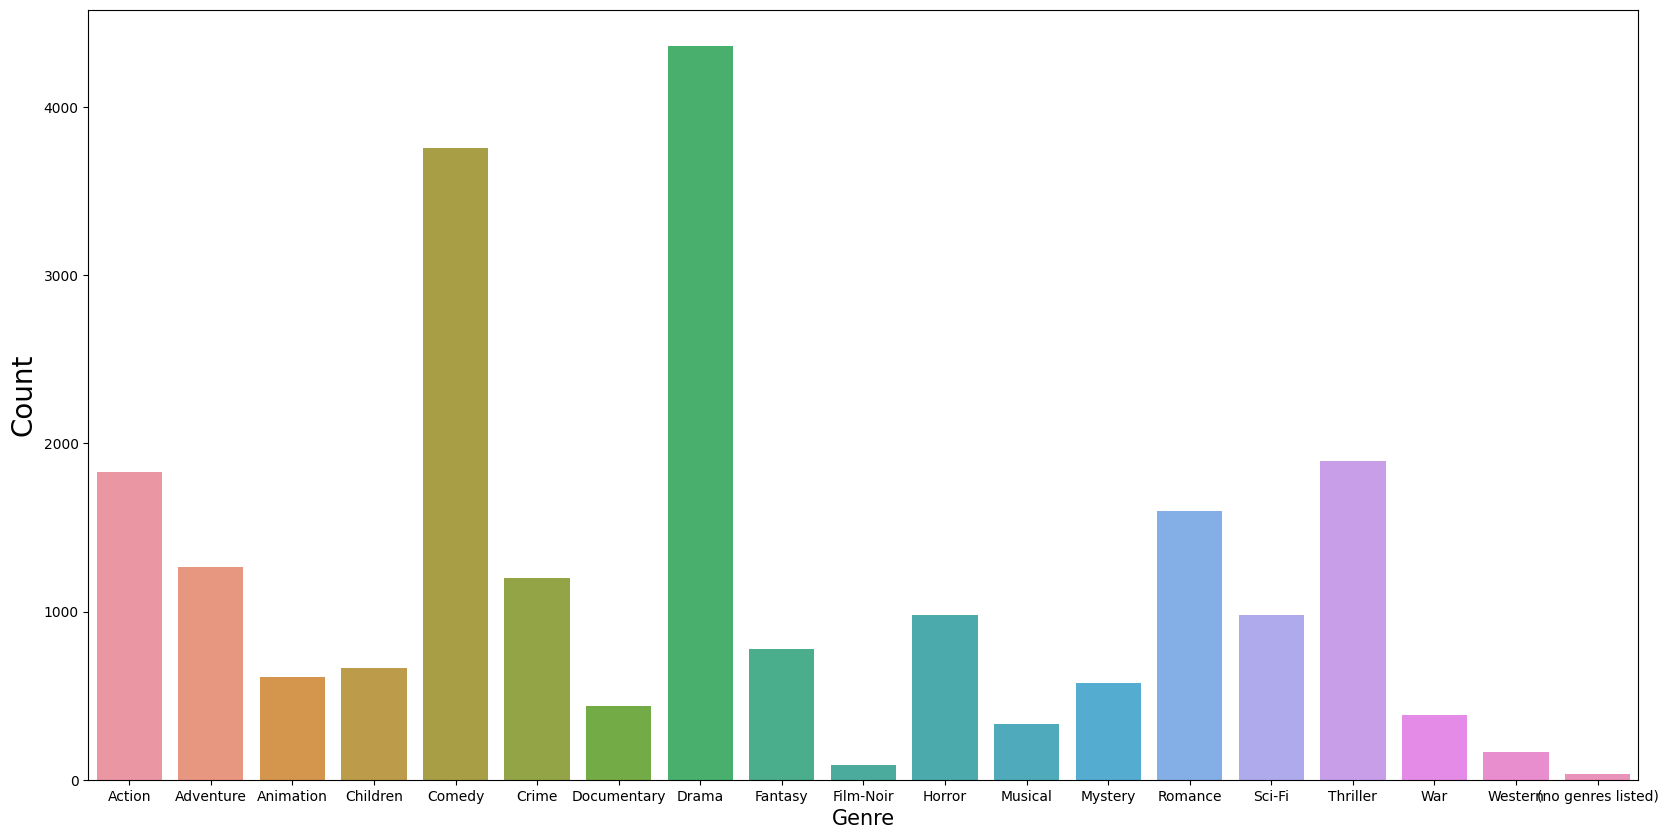

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['genre'], y=df['count'])
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Count', fontsize=20)
plt.show()

---

### 연도별 영화 갯수

In [23]:
movie.groupby('year').count()

,movieId,title,genres
year,,,
1902,1,1,1
1903,1,1,1
1908,1,1,1
1915,1,1,1
1916,4,4,4
...,...,...,...
2015,275,275,275
2016,222,222,222
2017,149,149,149


In [24]:
year_movie = pd.DataFrame(movie.groupby('year')['movieId'].count()).reset_index()
year_movie

,year,movieId
0,1902,1
1,1903,1
2,1908,1
3,1915,1
4,1916,4
...,...,...
102,2015,275
103,2016,222
104,2017,149
105,2018,42


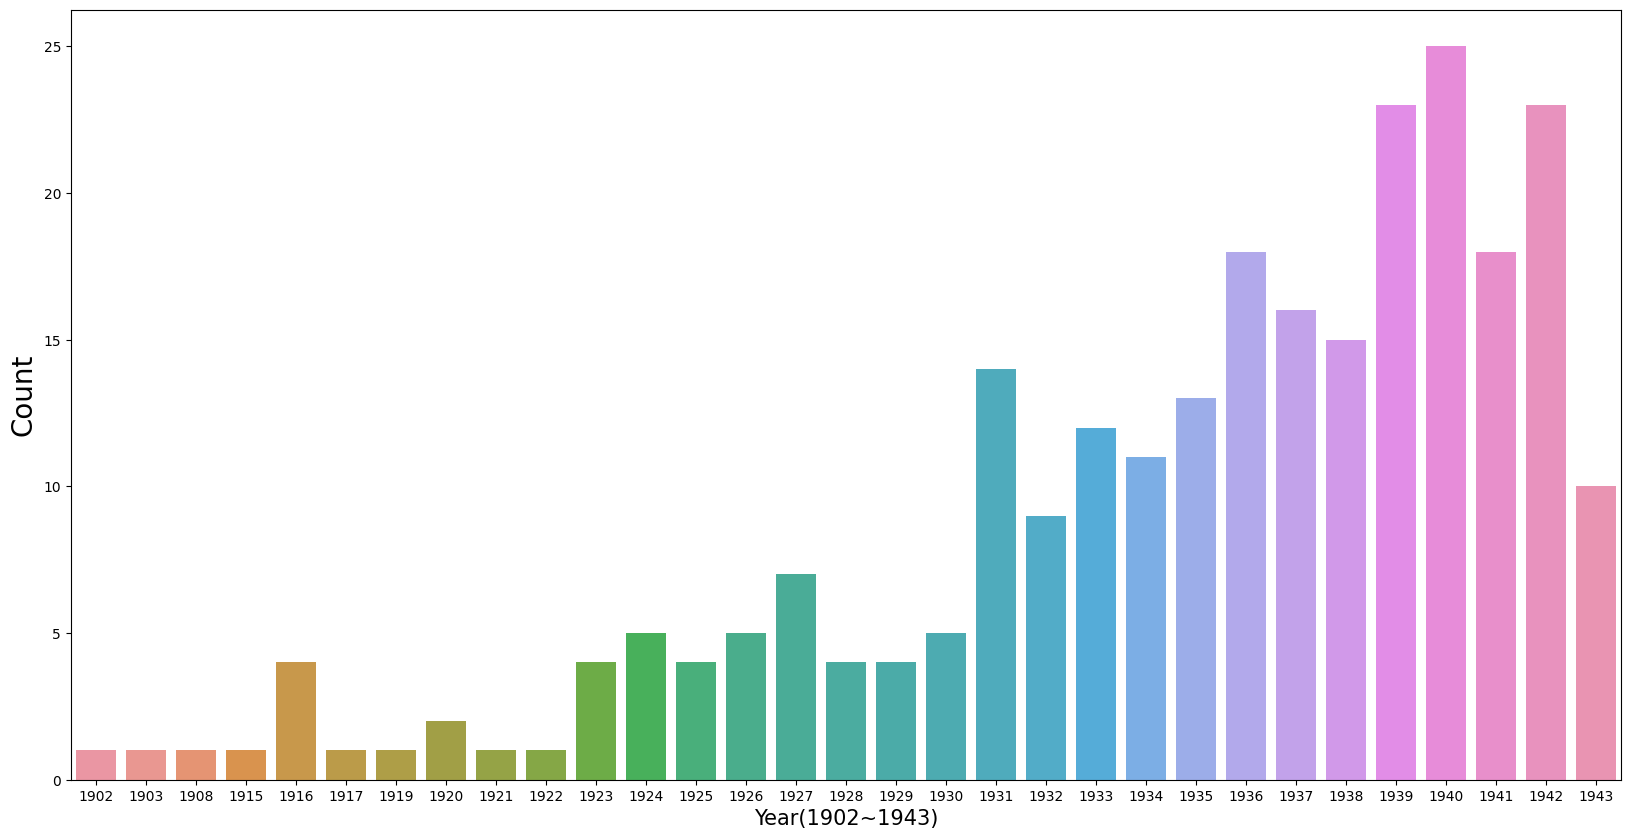

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(x=year_movie.loc[0:30,'year'], y=year_movie.loc[0:30,'movieId'])
plt.xlabel('Year(1902~1943)', fontsize=15)
plt.ylabel('Count', fontsize=20)
plt.show()

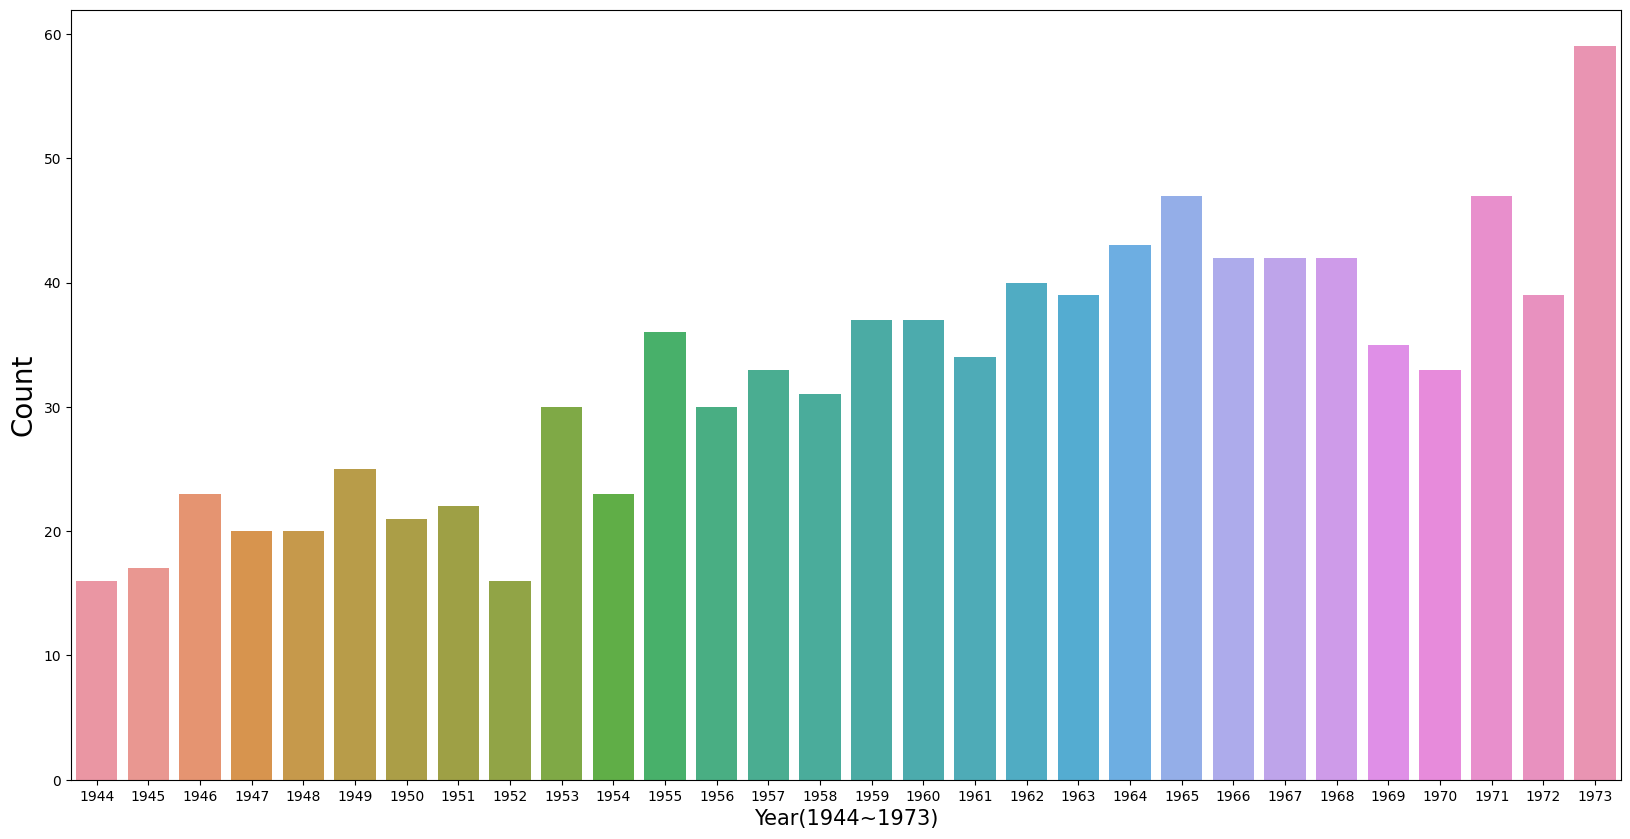

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(x=year_movie.loc[31:60,'year'], y=year_movie.loc[31:60,'movieId'])
plt.xlabel('Year(1944~1973)', fontsize=15)
plt.ylabel('Count', fontsize=20)
plt.show()

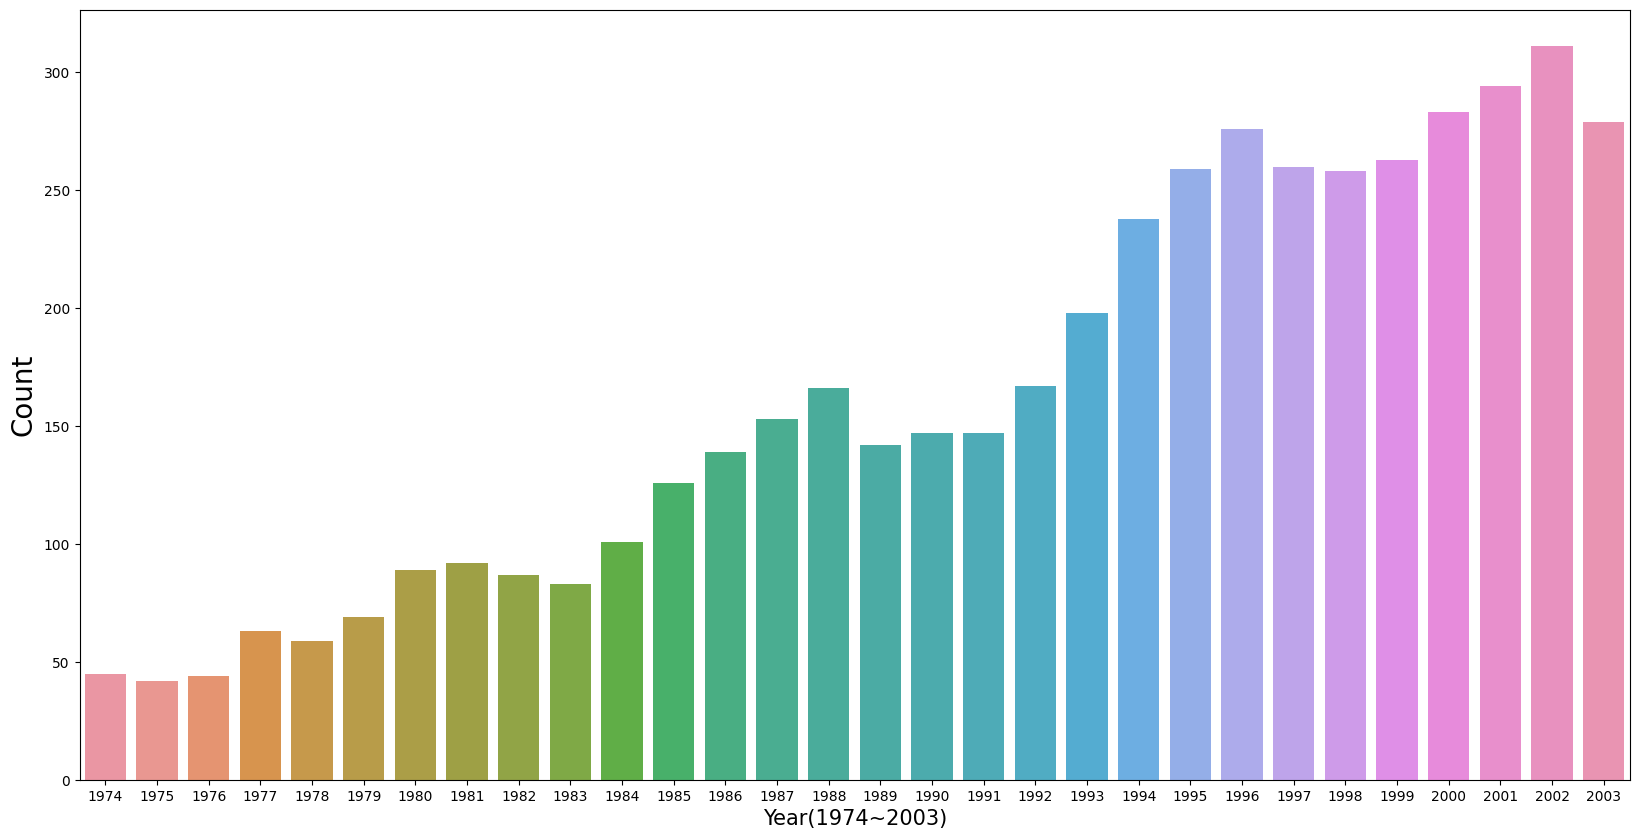

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x=year_movie.loc[61:90,'year'], y=year_movie.loc[61:90,'movieId'])
plt.xlabel('Year(1974~2003)', fontsize=15)
plt.ylabel('Count', fontsize=20)
plt.show()

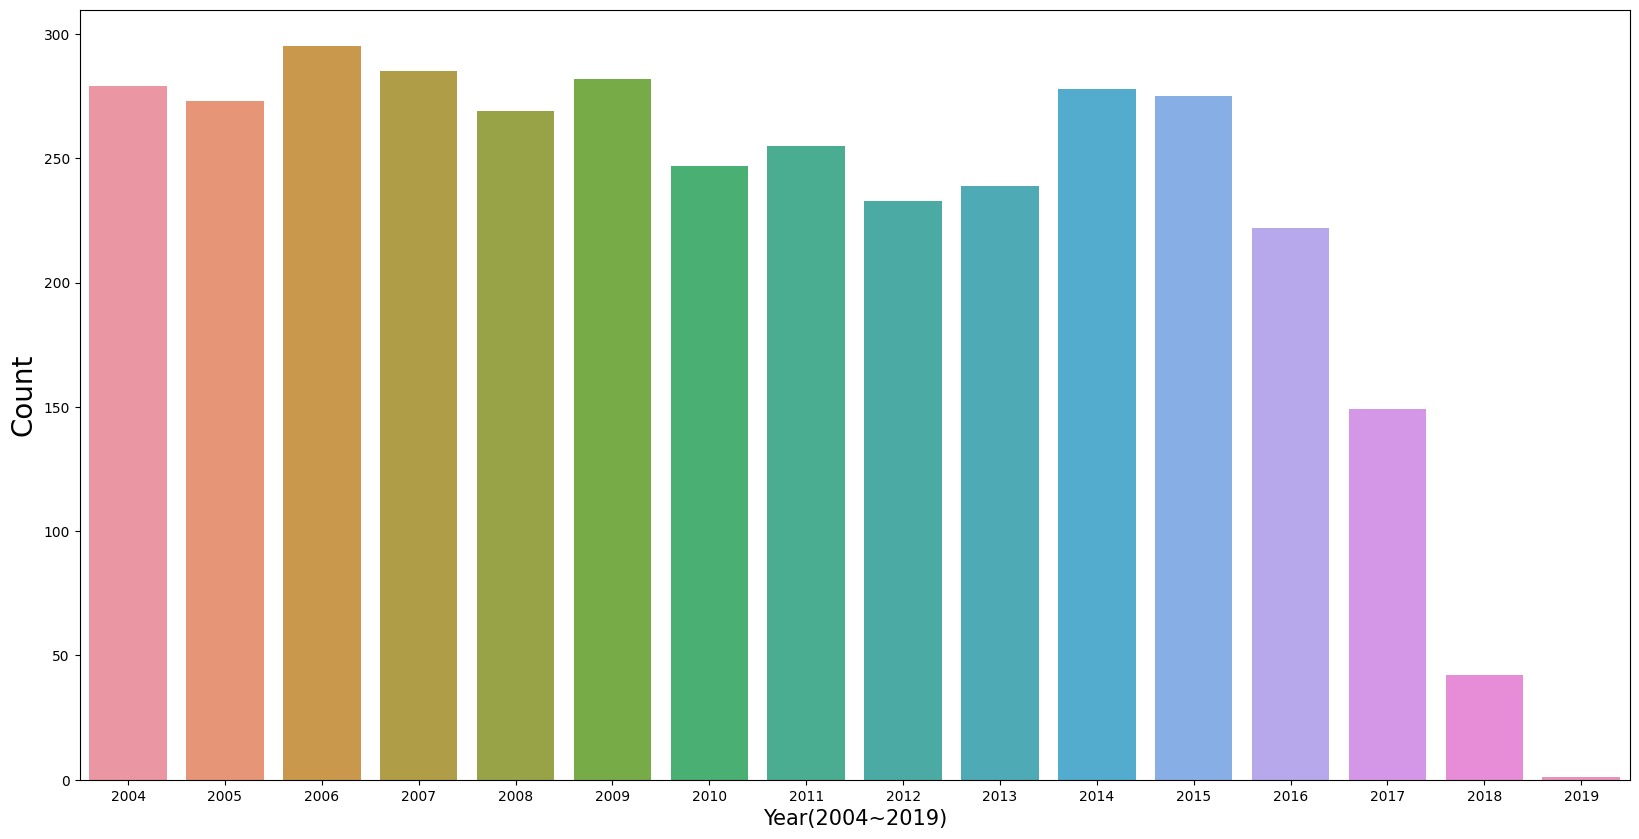

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(x=year_movie.loc[91:,'year'], y=year_movie.loc[91:,'movieId'])
plt.xlabel('Year(2004~2019)', fontsize=15)
plt.ylabel('Count', fontsize=20)
plt.show()

2000년대 초부터 중반까지 영화가 가장 많이 개봉했다.

---

### 연도별 어떤 장르의 영화가 가장 많이 개봉했을까?

In [29]:
movie.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [30]:
# 연도 리스트
mo_year = movie.year.value_counts().index.tolist()
mo_year = sorted(mo_year)

In [31]:
lst1 = [];lst2 = []

for i in mo_year:
    # 먼저 연도별로 데이터프레임을 추출한다
    year_data = movie[movie["year"] == i].reset_index(drop=True)
    # 추출된 데이터프레임에서 장르별 영화갯수를 추출한다.
    year_count = genre_count(year_data)
    # 영화 갯수가 최대일 때의 장르를 추출한다.
    genrelst = year_count[year_count['count'] == max(year_count['count'])].genre.tolist()
    genre = ', '.join(genrelst)
    
    # lst1에는 가장 많이 개봉된 장르의 영화 수를
    lst1.append(max(year_count['count']))
    # lst2에는 그 장르를 넣는다.
    lst2.append(genre)

In [32]:
df = pd.DataFrame({'year' : mo_year, 'count' : lst1, 'genre' : lst2})
df.head()

,year,count,genre
0,1902,1,"Action, Adventure, Fantasy, Sci-Fi"
1,1903,1,"Crime, Western"
2,1908,1,"Animation, Comedy, Sci-Fi"
3,1915,1,"Drama, War"
4,1916,1,"Action, Adventure, Comedy, Drama, Fantasy, Rom..."


In [33]:
# 개봉 영화 상위 30개 추출
df_20 = df.nlargest(20, 'count')

In [34]:
df_20

,year,count,genre
89,2002,150,Drama
88,2001,148,Drama
93,2006,146,Drama
94,2007,142,Drama
92,2005,140,Drama
87,2000,138,Drama
96,2009,131,Drama
90,2003,129,Drama
83,1996,128,Drama
91,2004,128,Drama


대부분 극영화가 가장 많이 개봉했으나, 2015년, 2012년에는 코미디 영화가 더 많이 개봉했다.

---

### 영화별 평균 평점 구하기

In [35]:
rating.head()

,userId,movieId,rating,timestamp,datetime
0,1,1,4.0,964982703,2000-07-31 03:45:03
1,1,3,4.0,964981247,2000-07-31 03:20:47
2,1,6,4.0,964982224,2000-07-31 03:37:04
3,1,47,5.0,964983815,2000-07-31 04:03:35
4,1,50,5.0,964982931,2000-07-31 03:48:51


In [36]:
rating.groupby('movieId')['rating'].mean()

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

In [37]:
# 영화에 합쳐보기
pd.merge(movie, rating.groupby('movieId')['rating'].mean(), on='movieId')

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.357143
4,5,Father of the Bride Part II (1995),Comedy,1995,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017,3.500000
9721,193585,Flint (2017),Drama,2017,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018,3.500000


---

### 유저의 평균평점 구하기

In [39]:
rating.groupby('userId')['rating'].mean()

userId
1      4.366379
2      3.948276
3      2.435897
4      3.555556
5      3.636364
         ...   
606    3.657399
607    3.786096
608    3.134176
609    3.270270
610    3.688556
Name: rating, Length: 610, dtype: float64

<br>

## CF

In [53]:
matrix = np.array(rating_df)
matrix

array([[4. , 4. , 4. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [2.5, 2. , 0. , ..., 0. , 0. , 0. ],
       [3. , 0. , 0. , ..., 0. , 0. , 0. ],
       [5. , 0. , 5. , ..., 3. , 3.5, 3.5]])

In [54]:
# 코사인 유사도로 아이템간의 유사도 구하는 함수
def cosine_simillarity(v1, v2):
    A = np.sqrt(np.sum(np.square(v1)))
    B = np.sqrt(np.sum(np.square(v2)))
    return np.dot(v1,v2) / (A*B)

In [57]:
sim_lst = []  # 빈 리스트 생성
best_score = 0

for idx, vec in enumerate(matrix):  # 매트릭스의 각 사용자 별 벡터를 뽑아 vec에 넣기
    similarity = cosine_simillarity( vec, matrix[2]) # matrix[2] == 사용자3의 벡터
    sim_lst.append((idx,similarity))  
    if idx != 2 and best_score < similarity:  # 현재 계산한 유사도가 기존 최고 유사도보다 높다면 바꿔준다. 
        best_score = similarity
        best_user = idx +1   
print(f"\n유저3과 가장 비슷한 유저: 유저{best_user} \n유사도:{best_score}")


유저3과 가장 비슷한 유저: 유저313 
유사도:0.07818732282993371


In [64]:
pd.DataFrame(sim_lst)

,0,1
0,0,0.059720
1,1,0.000000
2,2,1.000000
3,3,0.002251
4,4,0.005020
...,...,...
605,605,0.012993
606,606,0.019247
607,607,0.021128
608,608,0.000000
